# Exercise 2 逻辑回归

In [37]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the logistic
#  regression exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoid.m
#     costFunction.m
#     predict.m
#     costFunctionReg.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import optimize
import importlib
import library as lib
importlib.reload(lib)

## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = np.loadtxt('ex2data1.txt', delimiter = ',');
X = data[:, :2]; y = data[:, 2:];

# 画图

In [38]:
def plotData(X, y):
    #PLOTDATA Plots the data points X and y into a new figure 
    #   PLOTDATA(x,y) plots the data points with + for the positive examples

    #   and o for the negative examples. X is assumed to be a Mx2 matrix.


    # Create New Figure
    fig = plt.figure()

    # ====================== YOUR CODE HERE ======================

    # Instructions: Plot the positive and negative examples on a
    #               2D plot, using the option 'k+' for the positive
    #               examples and 'ko' for the negative examples.
    #

    # Find Indices of Positive and Negative Examples
    pos = np.where(y==1)
    neg = np.where(y==0)
    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k+',linewidth=2, markersize=7);
    plt.plot(X[neg, 0], X[neg, 1], 'ko', markerfacecolor='y', markersize=7);
    
    #plt.show()

['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']


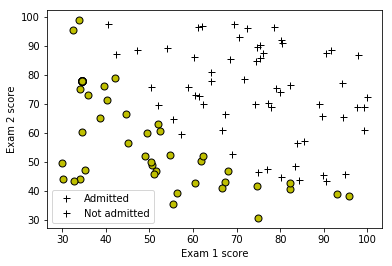

In [39]:
## ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print(['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']);

plotData(X, y);

# Put some labels 
# Labels and Legend
#fig = plt.figure()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(labels = ['Admitted', 'Not admitted'])

In [40]:
def sigmoid(z):
    #SIGMOID Compute sigmoid function
    #   g = SIGMOID(z) computes the sigmoid of z.

    # You need to return the following variables correctly 
    #g = np.zeros(len(np.array(z)))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).
    return 1 / (1 + np.exp(-z))

    # =============================================================

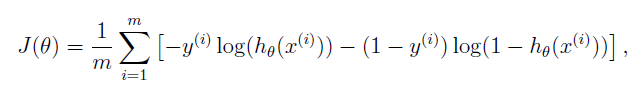
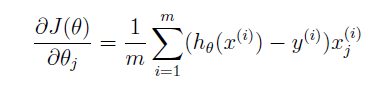

# 计算损失函数和梯度

In [41]:
## ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in 
#  costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
data = np.loadtxt('ex2data1.txt', delimiter=',');
X = data[:, :2]; y = data[:, 2:];

m, n = X.shape;

# Add intercept term to x and X_test
X = np.column_stack((np.ones((m, 1)), X))

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

In [42]:
def costFunction(theta, X, y):
    #COSTFUNCTION Compute cost and gradient for logistic regression
    #   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #   parameter for logistic regression and the gradient of the cost
    #   w.r.t. to the parameters.
    # 提供给最优化算法调度，theta必须是第一个参数, 并且是一维数组

    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;
    theta = theta.reshape(-1,1) 
    grad = np.zeros(len(theta));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    #
    J = (1/m)*np.sum(-y*np.log(sigmoid(np.dot(X,theta))) - (1-y)*np.log(1-sigmoid(np.dot(X,theta))))
    #grad = (1/m)*np.dot((X.T),(sigmoid(np.dot(X,theta))-y))

    #return J, grad
    #return J, np.zeros((m,1))
    return J
    # =============================================================

In [43]:
def gradient(theta, X, y):
    # 和MATLAB中的实现不同，Python需要单独的梯度函数作为参数传递给最优化算法
    # 为符合最优化算法的规则，参数theta需要是一维数组
    m = len(y);
    J = 0;
    theta = theta.reshape(-1,1)
    grad = np.zeros(len(theta));
    
    grad = (1/m)*np.dot((X.T),(sigmoid(np.dot(X,theta))-y))
    
    return grad.ravel() #作为最优化方法的fprime参数输入，是一个一维数组

In [44]:
# Compute and display initial cost and gradient
#cost, grad = costFunction(initial_theta, X, y);
cost = costFunction(initial_theta, X, y);
grad = gradient(initial_theta, X, y)

print('Cost at initial theta (zeros): %f\n'%cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print(grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]]);
cost = costFunction(test_theta, X, y);
grad = gradient(test_theta, X, y)


print('\nCost at test theta: %f\n'%cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: \n');
print(grad);
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: 0.218330

Expected cost (approx): 0.218

Gradient at test theta: 

[ 0.04290299  2.56623412  2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost at theta found by fminunc: 0.203498

Expected cost (approx): 0.203

theta: 

[-25.16133284   0.2062317    0.2014716 ]
Expected theta (approx):

 -25.161
 0.206
 0.201



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


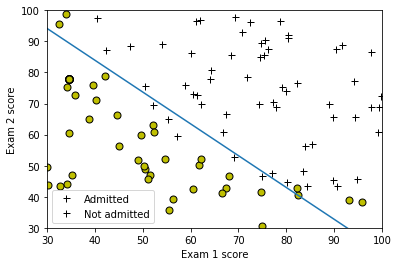

In [50]:
## ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.


#  Set options for fminunc
#options = optimset('GradObj', 'on', 'MaxIter', 400);

#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost 
theta = optimize.fmin_bfgs(costFunction, initial_theta.ravel(), fprime=gradient, args=(X, y), maxiter = 400)
cost = costFunction(theta, X, y) #如何从fmin_bfgs获得？

# Print theta to screen
print('Cost at theta found by fminunc: %f\n'%cost);
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print(theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');


# Plot Boundary
lib.plotDecisionBoundary(theta, X, y);

# Put some labels 
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'])

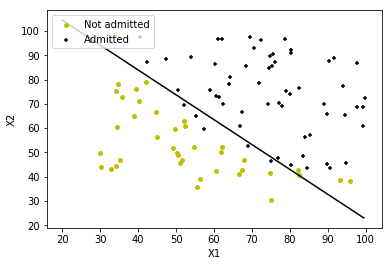

In [47]:
# 参考https://github.com/TingNie/Coursera-ML-using-matlab-python/blob/master/logic_regression.ipynb代码
#可视化一下线性的决策边界
label = np.array(y)
index_0 = np.where(label.ravel()==0)
plt.scatter(X[index_0,1],X[index_0,2],marker='o'\
            ,color = 'y',label = 'Not admitted',s = 15)
index_1 =np.where(label.ravel()==1)
plt.scatter(X[index_1,1],X[index_1,2],marker='+',\
            color = 'black',label = 'Admitted',s = 15)

#show the decision boundary
x1 = np.arange(20,100,0.5)
x2 = (- theta[0] - theta[1]*x1) / theta[2] # theta0+theta1*x1+theta2*x2=0
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

In [23]:
import importlib
import library as lib
importlib.reload(lib)

<module 'library' from 'C:\\Users\\olivia\\OneDrive - Hewlett Packard Enterprise\\Documents\\Code\\Python\\Machine Learning\\NgWu\\ex2\\library.py'>

In [24]:
## ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Your task is to complete the code in predict.m

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of \n');
print(prob)
print('Expected value: 0.775 +/- 0.002\n\n');

# Compute accuracy on our training set
p = lib.predict(theta, X);

print('Train Accuracy: %f\n'%(np.mean(np.double(p == y)) * 100))
print('Expected accuracy (approx): 89.0\n');
print('\n');

For a student with scores 45 and 85, we predict an admission probability of 

0.776290724059
Expected value: 0.775 +/- 0.002


Train Accuracy: 89.000000

Expected accuracy (approx): 89.0



